Краткое описание данных: 

* fhpolity - «уровень демократии», непрерывная шкала от 0 до 10, где 10 соответствует максимальному значению демо-
кратии. Агрегированный показатель на основе индексов Freedom House и Polity.
* dembinary - бинарный показатель демократии: 1 − демократия, 0 − в противном случае
* lngdppc - логарифм ВВП на душу населения
* wbge - эффективность государственного управления (WGI)

## Задание 1
Постройте модель регрессии (1), в которой откликом выступает эффективность государственного управления (wbge), предикторами – уровень демократии (fhpolity), логарифм ВВП на душу населения(lngdppc), переменная взаимодействия между уровнем демократии и логарифмом ВВП на душу населения. Проинтерпретируйте оценки коэффициентов при всех предикторах.

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_stata('hw_inter_1.dta')
df.head(10)

,cname,dembinary,fhpolity,wbge,lngdppc
0,Albania,1,7.583333,-0.569151,8.327136
1,Algeria,0,3.000000,-0.614924,8.652341
2,Angola,0,3.250000,-1.254168,7.588314
3,Azerbaijan,0,2.000000,-0.947889,8.256179
4,Argentina,1,7.833333,-0.260039,9.165509
5,Australia,1,10.000000,1.697198,10.208059
6,Austria,1,10.000000,1.965897,10.216334
7,Bahrain,0,2.416667,0.534436,9.846116
8,Bangladesh,1,6.500000,-0.695686,7.625331
9,Armenia,1,6.250000,-0.172452,8.375190


In [10]:
#Проверить пропуски в данных
df.isna().any().any()

False

In [11]:
import statsmodels.api as sm 

In [64]:
m1 = sm.OLS.from_formula("wbge ~ fhpolity + lngdppc+ fhpolity:lngdppc", data = df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wbge   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     157.5
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           2.00e-46
Time:                        16:07:08   Log-Likelihood:                -110.78
No. Observations:                 156   AIC:                             229.6
Df Residuals:                     152   BIC:                             241.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.3203      0.634  

* Intercept - При условии того, что уровень демократии = 0, то уровень эффективности государственного управления = -2.3203.И при прочих коэфф = 0.
* Fhpolity - При увеличении уровня демократии на 1, при условии, что логарифм ВВП = 0, уровень эффективности государственного управления изменяется на -0.4217. При прочих равных условиях.
* Ingdppc - При увеличении логарифма ВВП на 1, при условии, что уровень демократии = 0, уровень эффективности государственного управления повышвется на 0.1825. При прочих равных условиях.
* fhpolity:lngdppc - Одновременное увеличение уровня демократии и логарифма ВВП на 1 уровень эффективности государственного управления повышвется на 0.0609. При прочих равных условиях.

Оценка значимости коэффициентов (H0: коэфф = 0,  H1: коэфф != 0): 
fhpolity: (-0,4217 - 0)/(0,103) = -4,09 (Н0 отвергается, коэфф значимый)
lngdppc: (0.1825 - 0)/(0,076) = 2,4 (Н0 отвергается, коэфф значимый)
fhpolity:lngdppc: (0.0609 - 0)/(0.012) = 5,075 (Н0 отвергается, коэфф значимый)

## Задание 2
Преобразуйте шкалу переменной логарифма ВВП на душу населения так, чтобы она включала значение 0. Оцените модель регрессии
(2) с преобразованной переменной, при этом сохраните такую же спецификацию, как и в предыдущей модели. Интерпретация оценок каких коэффициентов изменится по сравнению с соответствующими оценками коэффициентов в модели (1)? Приведите новую интерпретацию.

In [15]:
np.sum(df.lngdppc == 0) 

0

логарифм ВВП не принимает значние 0, поэтому нужна дополнительныя центрация(упрощает интерпретацию модели)

In [13]:
new_lngdppc = df['lngdppc'] - np.mean(df['lngdppc']) #центрирование
df['new_lngdppc'] = new_lngdppc

In [65]:
#новая модель регрессии
m2 = sm.OLS.from_formula("wbge ~ fhpolity + new_lngdppc+ fhpolity:new_lngdppc", data = df).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wbge   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     157.5
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           2.00e-46
Time:                        16:07:22   Log-Likelihood:                -110.78
No. Observations:                 156   AIC:                             229.6
Df Residuals:                     152   BIC:                             241.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7785 

Изменится интерпретация всех оценок:
* Intercept - При условии того, что уровень демократии =0, а ВВП равен среднему значению по выборке, то уровень эффективности государственного управления = -1.2578. При прочих коэфф = 0.
* Fhpolity - При увеличении уровня демократии на 1, при условии, ВВП равен среднему значению по выборке, уровень эффективности государственного управления изменяется на -0.4217. При прочих равных условиях.
* Ingdppc - При увеличении ВВП среднего значения ВВП по выборке, при условии, что уровень демократии = 0, уровень эффективности государственного управления повышвется на 0.1825. При прочих равных условиях.
* fhpolity:lngdppc - Одновременное увеличение уровня демократии и среднего значения ВВП на 1 уровень эффективности государственного управления повышвется на 0.0609. При прочих равных условиях.

## Задание 3
Рассчитайте предельные эффекты изменения логарифма ВВП на душу населения на эффективность государственного управления при
разных значениях уровня демократии (fhpolity). 
* Проинтерпретируйте результаты, в частности, укажите, как изменяется предельный эффект с ростом уровня демократии на единицу шкалы измерения.
* Постройте график, демонстрирующий изменение предельного эффекта в зависимости от уровня демократии (по оси абсцисс − уровень демократии). Проинтерпретируйте данный график.

* z - уровни демократии 
* b1 - коэфф при логарифме
* b3 - коэфф при переменной взаимодействия

Предельные эффекты = b1 + b3*z

In [66]:
print(m2.params)

Intercept              -0.778537
fhpolity                0.092703
new_lngdppc             0.182468
fhpolity:new_lngdppc    0.060883
dtype: float64


In [67]:
for x in range(0, 10):
    print(m2.params[1]+m2.params[3]*x)

0.09270298156357193
0.15358620473693008
0.21446942791028825
0.2753526510836464
0.3362358742570046
0.3971190974303627
0.4580023206037209
0.5188855437770791
0.5797687669504372
0.6406519901237954


С увеличением уровня демократии на единицу увеличивается предельный эффект роста логарифма ВВП (высокий уровень демократии увеличивает влияние изменения объема ВВП) 

In [81]:
print(m2.params)

Intercept              -0.778537
fhpolity                0.092703
new_lngdppc             0.182468
fhpolity:new_lngdppc    0.060883
dtype: float64


In [78]:
import matplotlib.pyplot as mpl
%matplotlib inline
from scipy.stats import norm

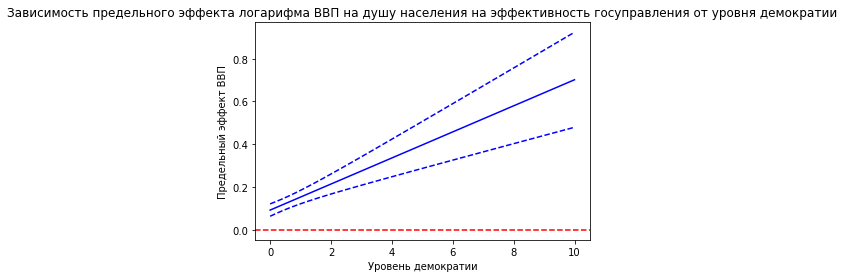

In [86]:
cov_m2 = np.asmatrix(m2.cov_params())
fhpolity_values = np.linspace(df.fhpolity.min(), df.fhpolity.max())
marg_effect_m2 = m2.params[1] + m2.params[3]*fhpolity_values
se2 = (cov_m2[1,1] + fhpolity_values**2*(cov_m2[3,3]) + 2*fhpolity_values*cov_m2[1,3])**(.5)
fig, axes = mpl.subplots()
mpl.plot(fhpolity_values, marg_effect_m2, 'b')
mpl.plot(fhpolity_values, marg_effect_m2 - norm.ppf(0.975)*se2, 'b--')
mpl.plot(fhpolity_values, marg_effect_m2 + norm.ppf(0.975)*se2, 'b--')
axes.set_xlabel('Уровень демократии')
axes.set_ylabel('Предельный эффект ВВП')
mpl.axhline(y=0, color ='r', linestyle = '--')
mpl.title('Зависимость предельного эффекта логарифма ВВП на душу населения на эффективность госуправления от уровня демократии')
mpl.show()

Все предельные эффекты не накрывают 0 и выше 0, поэтому предельный эффект ВВП для стран с любым уровнем демократии имееет значимость. Эффект ВВП на эффективность гос. управления увеличивается с увеличением уровня демократии.  

## Задание 4
Оцените модель регрессии (3), в которой откликом выступает эффективность государственного управления (wbge), предикторами – индикатор политического режима, представленный в бинарной шкале(dembinary), логарифм ВВП на душу населения (lngdppc), переменная взаимодействия между политическим режимом (dembinary) и логарифмом ВВП на душу населения. Рассчитайте и проинтерпретируйте предсказанные значения эффективности государственного управления при максимальном значении логарифма ВВП на душу населения в демократических и недемократических политических режимах.

In [41]:
m3 = sm.OLS.from_formula("wbge ~ dembinary + lngdppc+ dembinary:lngdppc", data = df).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wbge   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           2.73e-39
Time:                        15:49:45   Log-Likelihood:                -127.68
No. Observations:                 156   AIC:                             263.4
Df Residuals:                     152   BIC:                             275.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.6181      0.47

In [38]:
df1 = df[df.dembinary == 1] # демократия
df2 = df[df.dembinary == 0] # не демократия

In [42]:
print(m3.params)

Intercept           -3.618075
dembinary           -3.161840
lngdppc              0.378259
dembinary:lngdppc    0.423443
dtype: float64


Формула расчета предсказанных значений эффективности государственного управления:

y1(dembinary=0) = b0+lngdppc*макс.ВВП

y2(dembinary=1) = (b0+dembinary)+(lngdppc+dembinary:lngdppc)*макс.ВВП

In [44]:
y1 = m3.params[0] + (m3.params[2]*df2.lngdppc.max())
y1

0.3223362075531915

In [43]:
y1 = (m3.params[0] + m3.params[1]) + (m3.params[2] + m3.params[3])*df1.lngdppc.max()
y1

1.5918603035390495

WGI измеряется по шкале от –2,5 баллов (худшее значение) до 2,5 баллов (лучшее значение)
* Для недемеократий с максимальным значением ВВП на душу населения уровень эффективности государственного правления чуть выше 0, что является средним значением среди стран мира. При всех прочих равных условиях. 
* Для демеократий с максимальным значением ВВП на душу населения уровень эффективности государственного правления = 1.6, что является одним из самых высоких значениий среди стран мира. При всех прочих равных условиях. 

Получается, что зависимость эффективности государственного управления от логарифма ВВП на душу населения более ярко выражена (имеет более резкий подъем/slope) в демократиях, чем в недемократиях, при прочих равных условиях.

## Задание 5
Чему равны оценки констант и коэффициента при предикторе «логарифм ВВП на душу населения» в моделях, оцененных на отдельных
выборках (такие выборки сформированы на основании значения показателя dembinary)? Зависимой переменной остается эффективность государственного управления. Покажите, как можно получить эти оценки коэффициентов из оценок модели (3).

In [63]:
#dembinary = 0
m4 = sm.OLS.from_formula("wbge ~ lngdppc", data = df2).fit()
print(m4.params)

Intercept   -3.618075
lngdppc      0.378259
dtype: float64


In [62]:
#dembinary = 1
m5 = sm.OLS.from_formula("wbge ~ lngdppc+ lngdppc", data = df1).fit()
print(m5.params)

Intercept   -6.779914
lngdppc      0.801702
dtype: float64


In [58]:
#dembinary = 0
intercept = m3.params[0] 
slope = m3.params[2]
print(intercept, slope)

-3.6180748614844074 0.37825933066128037


In [59]:
#dembinary = 1
intercept = m3.params[0] + m3.params[1] 
slope = m3.params[2] + m3.params[3]
print(intercept, slope)

-6.779914472664438 0.801702221596243
